In [5]:
import pandas as pd, numpy as np,seaborn as sns, matplotlib.pyplot as plt

In [ ]:
dfs = [pd.read_csv(f"Dataset/dataset-of-{decade}0s.csv") for decade in ['0','1','6','7','8','9']]

In [7]:
for i, decade in enumerate([1960,1970,1980,1990,2000, 2010]):
    dfs[i]['decade'] = pd.Series(decade, index=dfs[i].index)

df = pd.concat(dfs, axis=0).sample(frac=1.0, random_state=1).reset_index(drop=True)

In [8]:
df.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,decade
0,For Stormboy,Rhiannon Bannenberg,spotify:track:1gLbbnyTOnx6LrCQ87c0gp,0.197,0.0473,8,-29.125,0,0.0441,0.992000,0.861000,0.0878,0.127,123.367,96500,3,42.60198,6,0,1970
1,The World Wasn't Made in One Day,Boytronic,spotify:track:6fzbrF0HJl72bDPBB232Wp,0.677,0.3660,5,-15.258,1,0.0288,0.120000,0.000000,0.0796,0.598,100.566,234000,4,41.36228,12,0,2000
2,Questions and Conclusions,Black Heat,spotify:track:3keqvEnmiZfDZoeTa6EWAd,0.623,0.7290,7,-9.870,1,0.0553,0.061300,0.034700,0.0392,0.841,127.640,256747,4,24.47229,13,0,1990
3,Bottom Feeder,Project 86,spotify:track:5j58ixcXqWIMZlnzhr5wPx,0.481,0.6090,9,-7.570,0,0.0317,0.000701,0.004350,0.0967,0.198,119.758,311360,4,34.21364,14,0,1970
4,Little Girl,Syndicate Of Sound,spotify:track:3UxZw2CfZ3dmNIii4CxMtG,0.587,0.6080,2,-10.425,1,0.0291,0.049200,0.000338,0.2170,0.726,90.528,147827,4,25.31822,11,1,1980


In [10]:
df.isnull().sum() #checking for null values in any if the data that is there in this

track               0
artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
decade              0
dtype: int64

In [15]:
df.describe() #stats for  the data

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,decade
count,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,4.110600e+04,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000
mean,0.539695,0.579545,5.213594,-10.221525,0.693354,0.072960,0.364197,0.154416,0.201535,0.542440,119.338249,2.348776e+05,3.893689,40.106041,10.475673,0.500000,1984.865470
std,0.177821,0.252628,3.534977,5.311626,0.461107,0.086112,0.338913,0.303530,0.172959,0.267329,29.098845,1.189674e+05,0.423073,19.005515,4.871850,0.500006,16.000324
min,0.000000,0.000251,0.000000,-49.253000,0.000000,0.000000,0.000000,0.000000,0.013000,0.000000,0.000000,1.516800e+04,0.000000,0.000000,0.000000,0.000000,1960.000000
25%,0.420000,0.396000,2.000000,-12.816000,0.000000,0.033700,0.039400,0.000000,0.094000,0.330000,97.397000,1.729278e+05,4.000000,27.599792,8.000000,0.000000,1970.000000
50%,0.552000,0.601000,5.000000,-9.257000,1.000000,0.043400,0.258000,0.000120,0.132000,0.558000,117.565000,2.179070e+05,4.000000,35.850795,10.000000,0.500000,1980.000000
75%,0.669000,0.787000,8.000000,-6.374250,1.000000,0.069800,0.676000,0.061250,0.261000,0.768000,136.494000,2.667730e+05,4.000000,47.625615,12.000000,1.000000,2000.000000
max,0.988000,1.000000,11.000000,3.744000,1.000000,0.960000,0.996000,1.000000,0.999000,0.996000,241.423000,4.170227e+06,5.000000,433.182000,169.000000,1.000000,2010.000000


we can remove time singature as moost of the data is 4 and will have no significant affect on the learning

In [18]:
df = df.drop(axis=1, labels='time_signature')

In [20]:
from sklearn.preprocessing import StandardScaler

In [22]:
scale = StandardScaler()
df_X=df.iloc[:,3:17]
df_scaled=scale.fit_transform(df_X)
df_scaled=pd.DataFrame(df_scaled)
df_scaled.columns = df_X.columns
df_scaled

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,chorus_hit,sections
0,-1.927217,-2.106855,0.788248,-3.558930,-1.503691,-0.335156,1.852423,2.327916,-0.657588,-1.554061,0.138452,-1.163169,0.131329,-0.918691
1,0.772164,-0.845303,-0.060424,-0.948210,0.665030,-0.512834,-0.720540,-0.508740,-0.704999,0.207835,-0.645128,-0.007376,0.066099,0.312888
2,0.468483,0.591608,0.505358,0.066181,0.665030,-0.205090,-0.893743,-0.394417,-0.938583,1.116839,0.285298,0.183829,-0.822600,0.518152
3,-0.330083,0.116596,1.071139,0.499199,-1.503691,-0.479156,-1.072549,-0.494409,-0.606131,-1.288467,0.014425,0.642894,-0.310040,0.723415
4,0.266030,0.112638,-0.909096,-0.038308,0.665030,-0.509350,-0.929446,-0.507627,0.089417,0.686652,-0.990094,-0.731727,-0.778090,0.107625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41101,2.189338,-0.952181,-1.191987,-0.124158,0.665030,3.461124,-0.964559,-0.508676,-0.084036,-1.007911,-0.699426,-0.266274,-0.966648,0.518152
41102,0.474107,0.001802,-0.909096,0.245225,0.665030,-0.518641,-0.401870,-0.508740,-0.436724,-0.304649,-0.618185,-0.400203,-0.698093,-1.123955
41103,0.513473,0.694527,0.505358,0.567729,0.665030,0.732076,-1.052989,-0.508740,-0.651228,-0.386945,-0.960883,0.189991,-0.885915,0.723415
41104,0.102942,0.943908,0.788248,1.158139,0.665030,-0.379285,-0.865122,-0.508740,0.048945,-0.334575,-1.316365,-0.423403,-1.044543,-0.713428


Text(0.5, 1.0, 'Box plot and OUTliers in it')

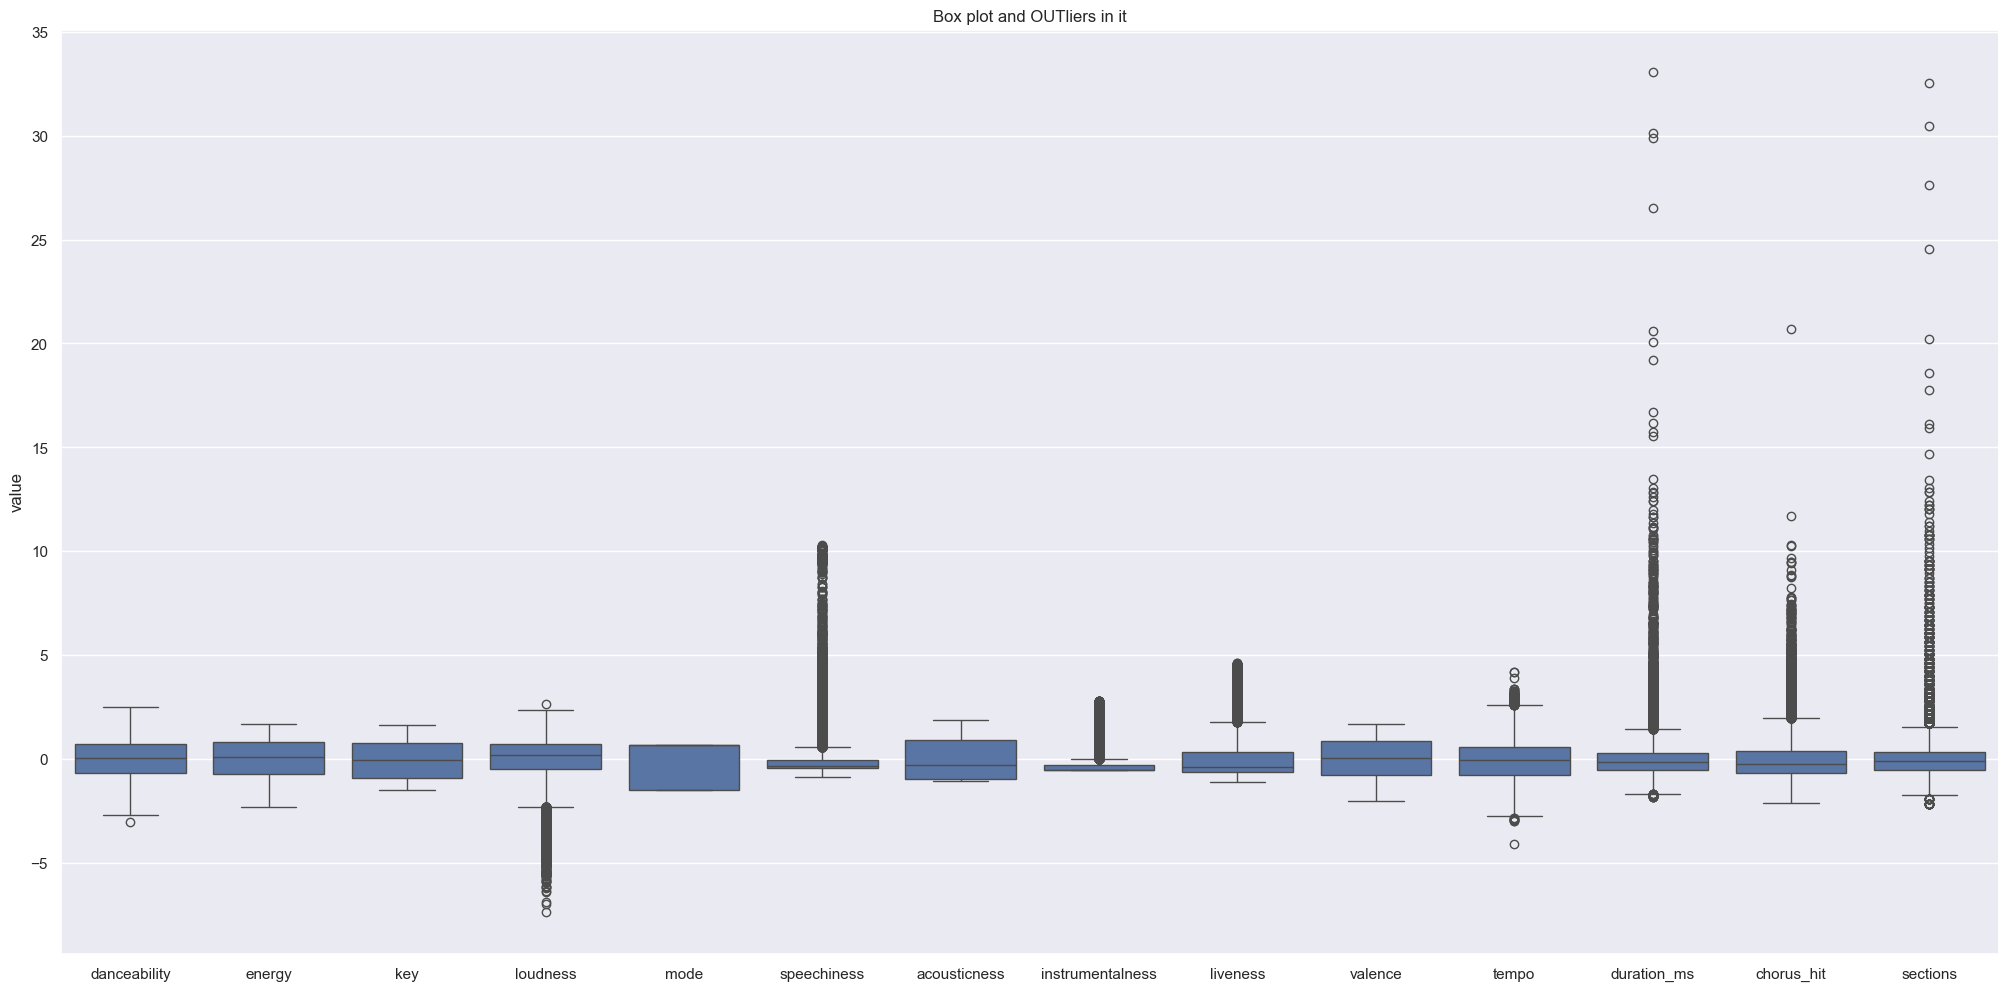

In [27]:
df_melt=pd.melt(df_scaled)
df_melt
sns.set(rc={'figure.figsize':(25,12)})
sns.boxplot(x='variable', y='value', data=df_melt)
plt.xlabel(None)
plt.title('Box plot and OUTliers in it')

Text(0.5, 1.0, 'Box plot wihtout OUTliers in it')

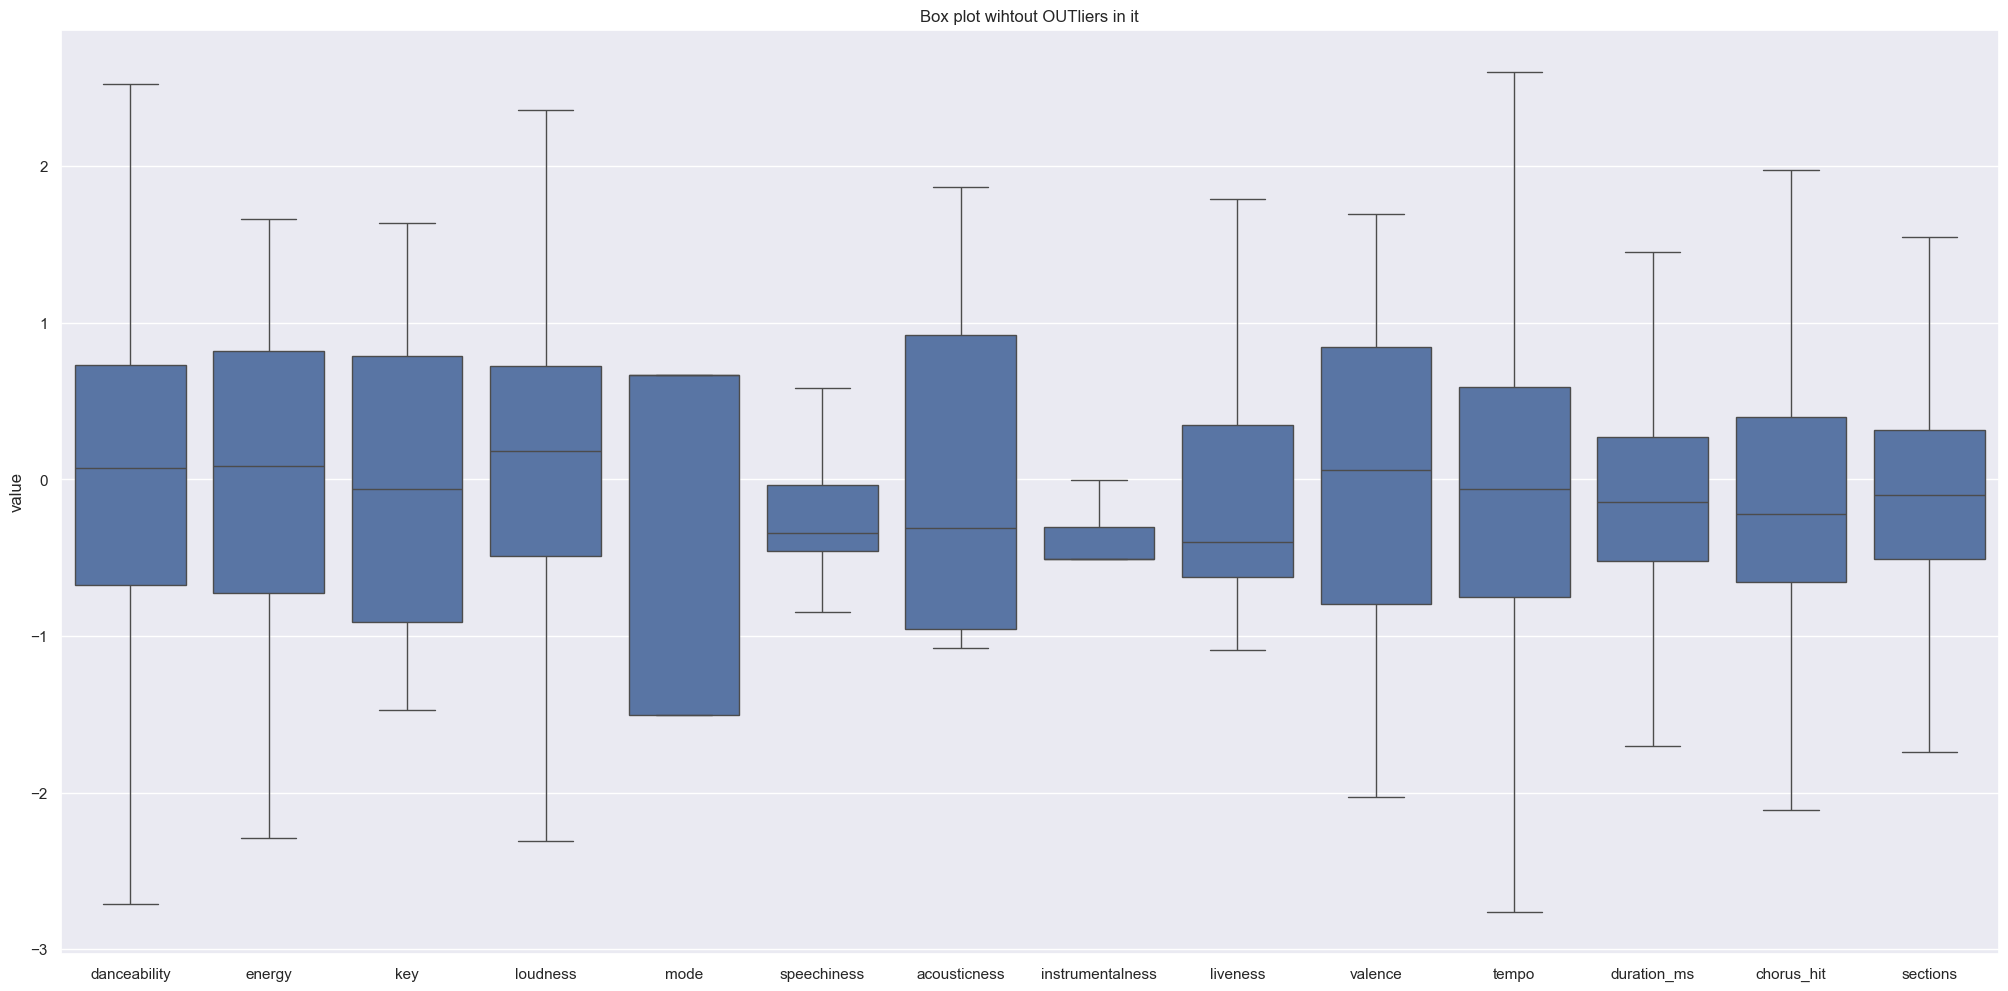

In [29]:
df_melt=pd.melt(df_scaled)
df_melt
sns.set(rc={'figure.figsize':(25,12)})
sns.boxplot(x='variable', y='value', data=df_melt,showfliers=False)
plt.xlabel(None)
plt.title('Box plot wihtout OUTliers in it')

In [31]:
df_final = df_scaled
for col in df_final.columns:
    q1= df_final[col].quantile(0.25)
    q3=df_final[col].quantile(0.75)
    r = q3-q1
    filter=(df_final[col]>=q1-1.5*r) & (df_final[col]<=q3+1.5*r)
    df_final[col]=df_final[col].loc[filter]
    df_final.isna().sum()
   

In [33]:
df_final.isna().sum()

danceability           1
energy                 0
key                    0
loudness            1343
mode                   0
speechiness         5088
acousticness           0
instrumentalness    8920
liveness            2688
valence                0
tempo                434
duration_ms         1987
chorus_hit          1839
sections            1570
dtype: int64

In [35]:
df_final = df_final.drop(axis=1, labels=['instrumentalness']) #highest outlier

In [37]:
df_final = df_final.drop(axis=1, labels=['speechiness']) #second highest

In [39]:
df_f2= df_final.dropna()
df_f2.shape

(33401, 12)

Text(0.5, 1.0, 'Wihtout outliers')

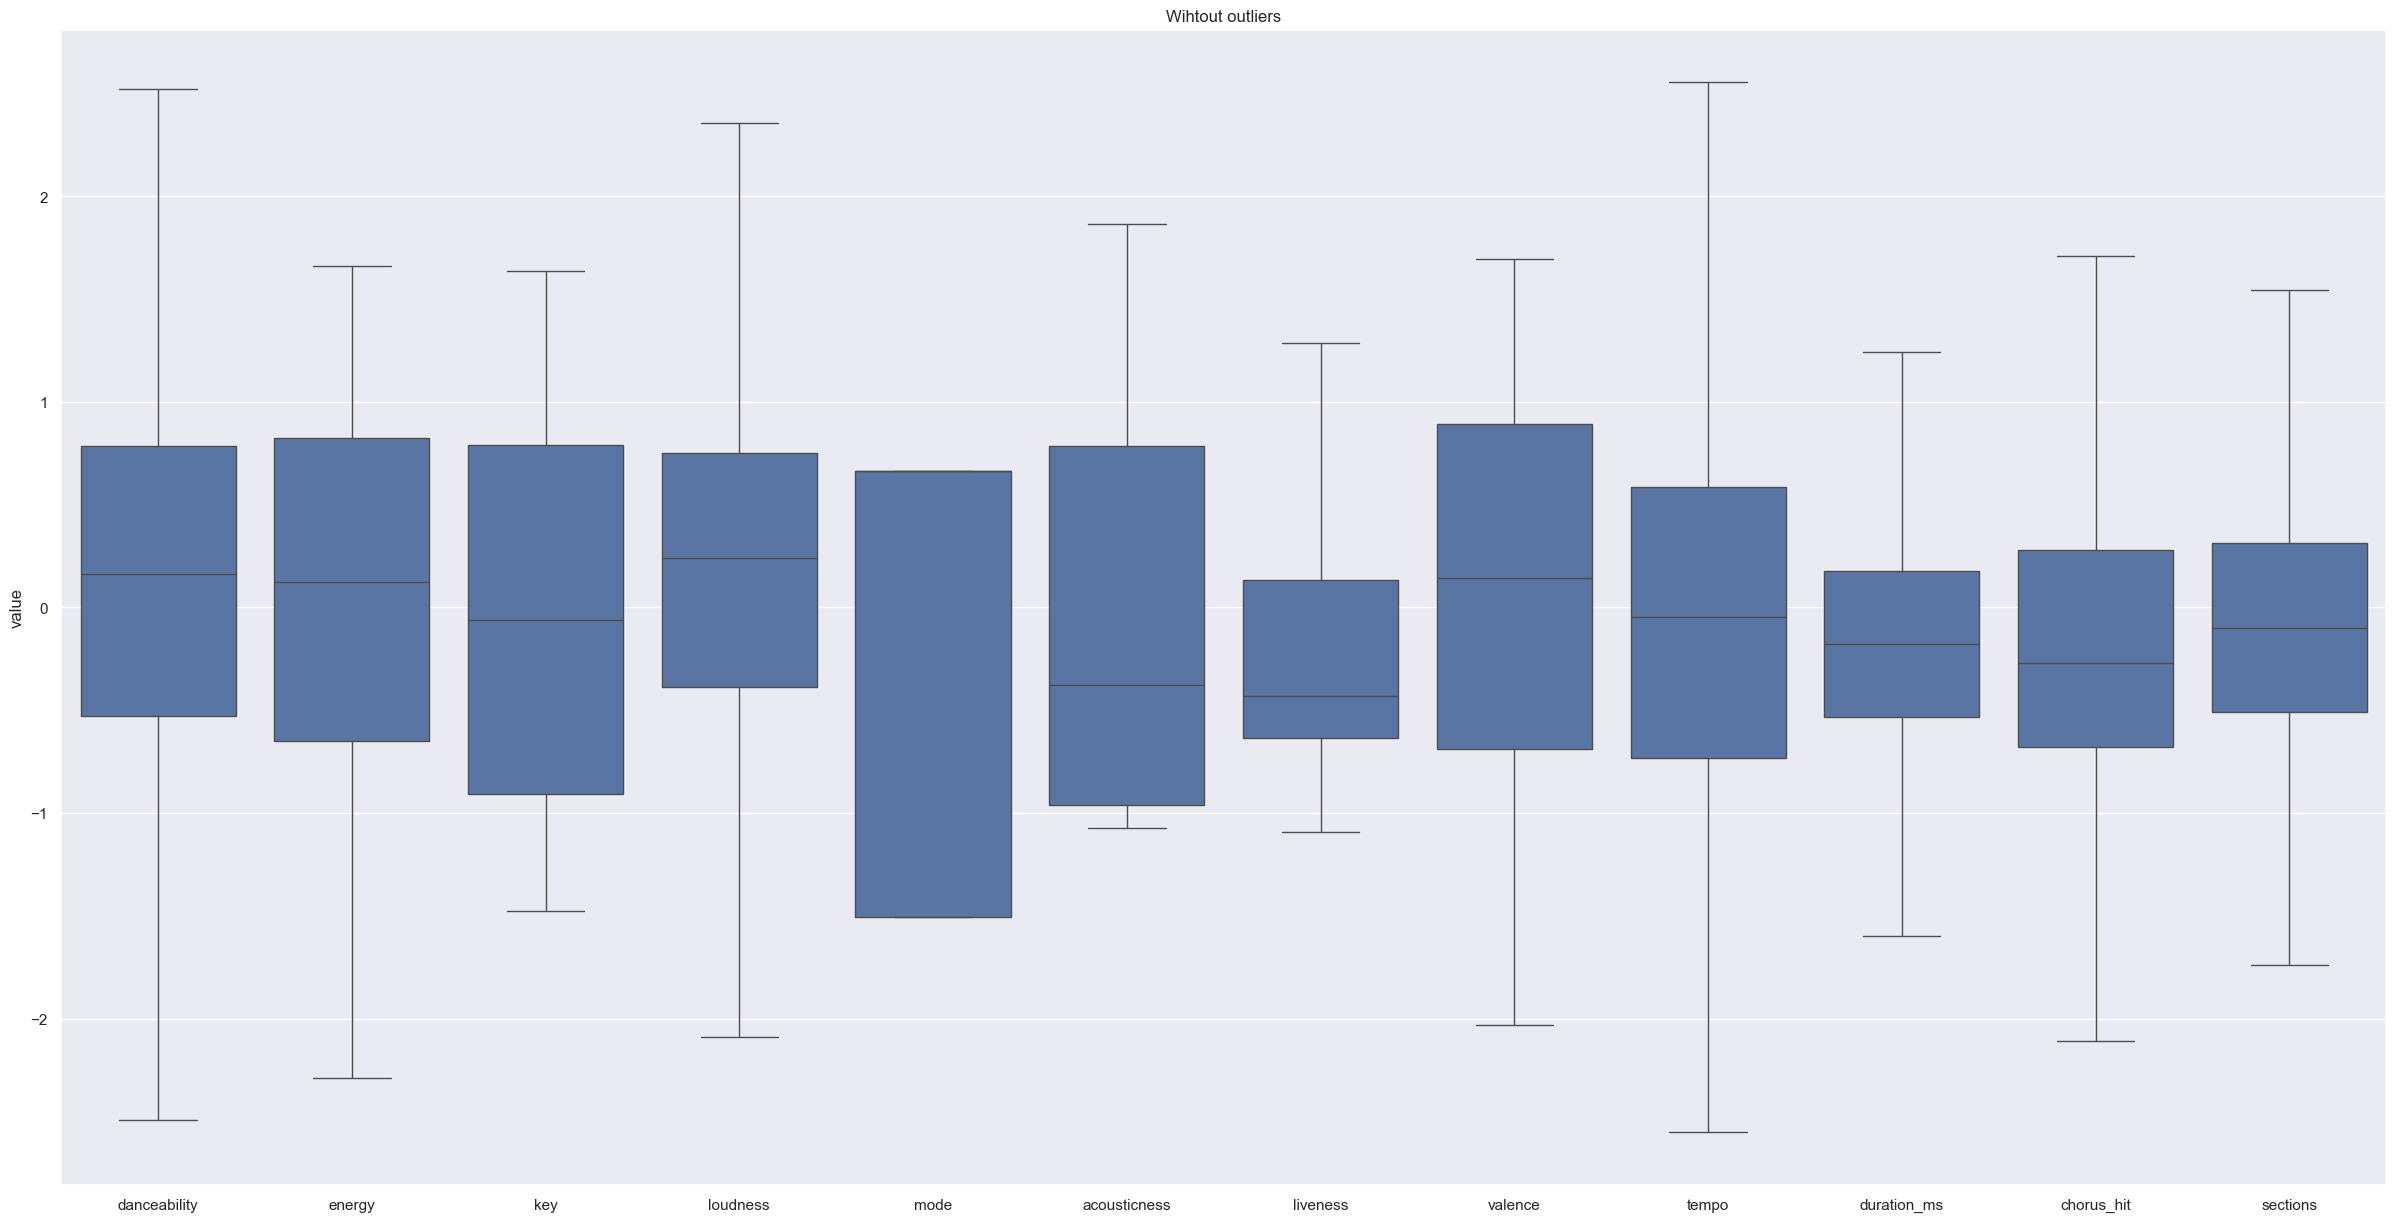

In [41]:
df_melt=pd.melt(df_f2) #predicotrs without outliers
df_melt
sns.set(rc={'figure.figsize':(30,15)})
sns.boxplot(x='variable',y='value',data=df_melt,showfliers = False)
plt.xlabel(None)
plt.title('Wihtout outliers')

Unscaled Dataframe wihtout the outlier

In [44]:
df_merge = df.iloc[df_f2.index]
df_merge = df_merge.drop(axis=1,labels=['speechiness','instrumentalness'])
df_merge.columns

Index(['track', 'artist', 'uri', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'acousticness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'chorus_hit', 'sections', 'target', 'decade'],
      dtype='object')

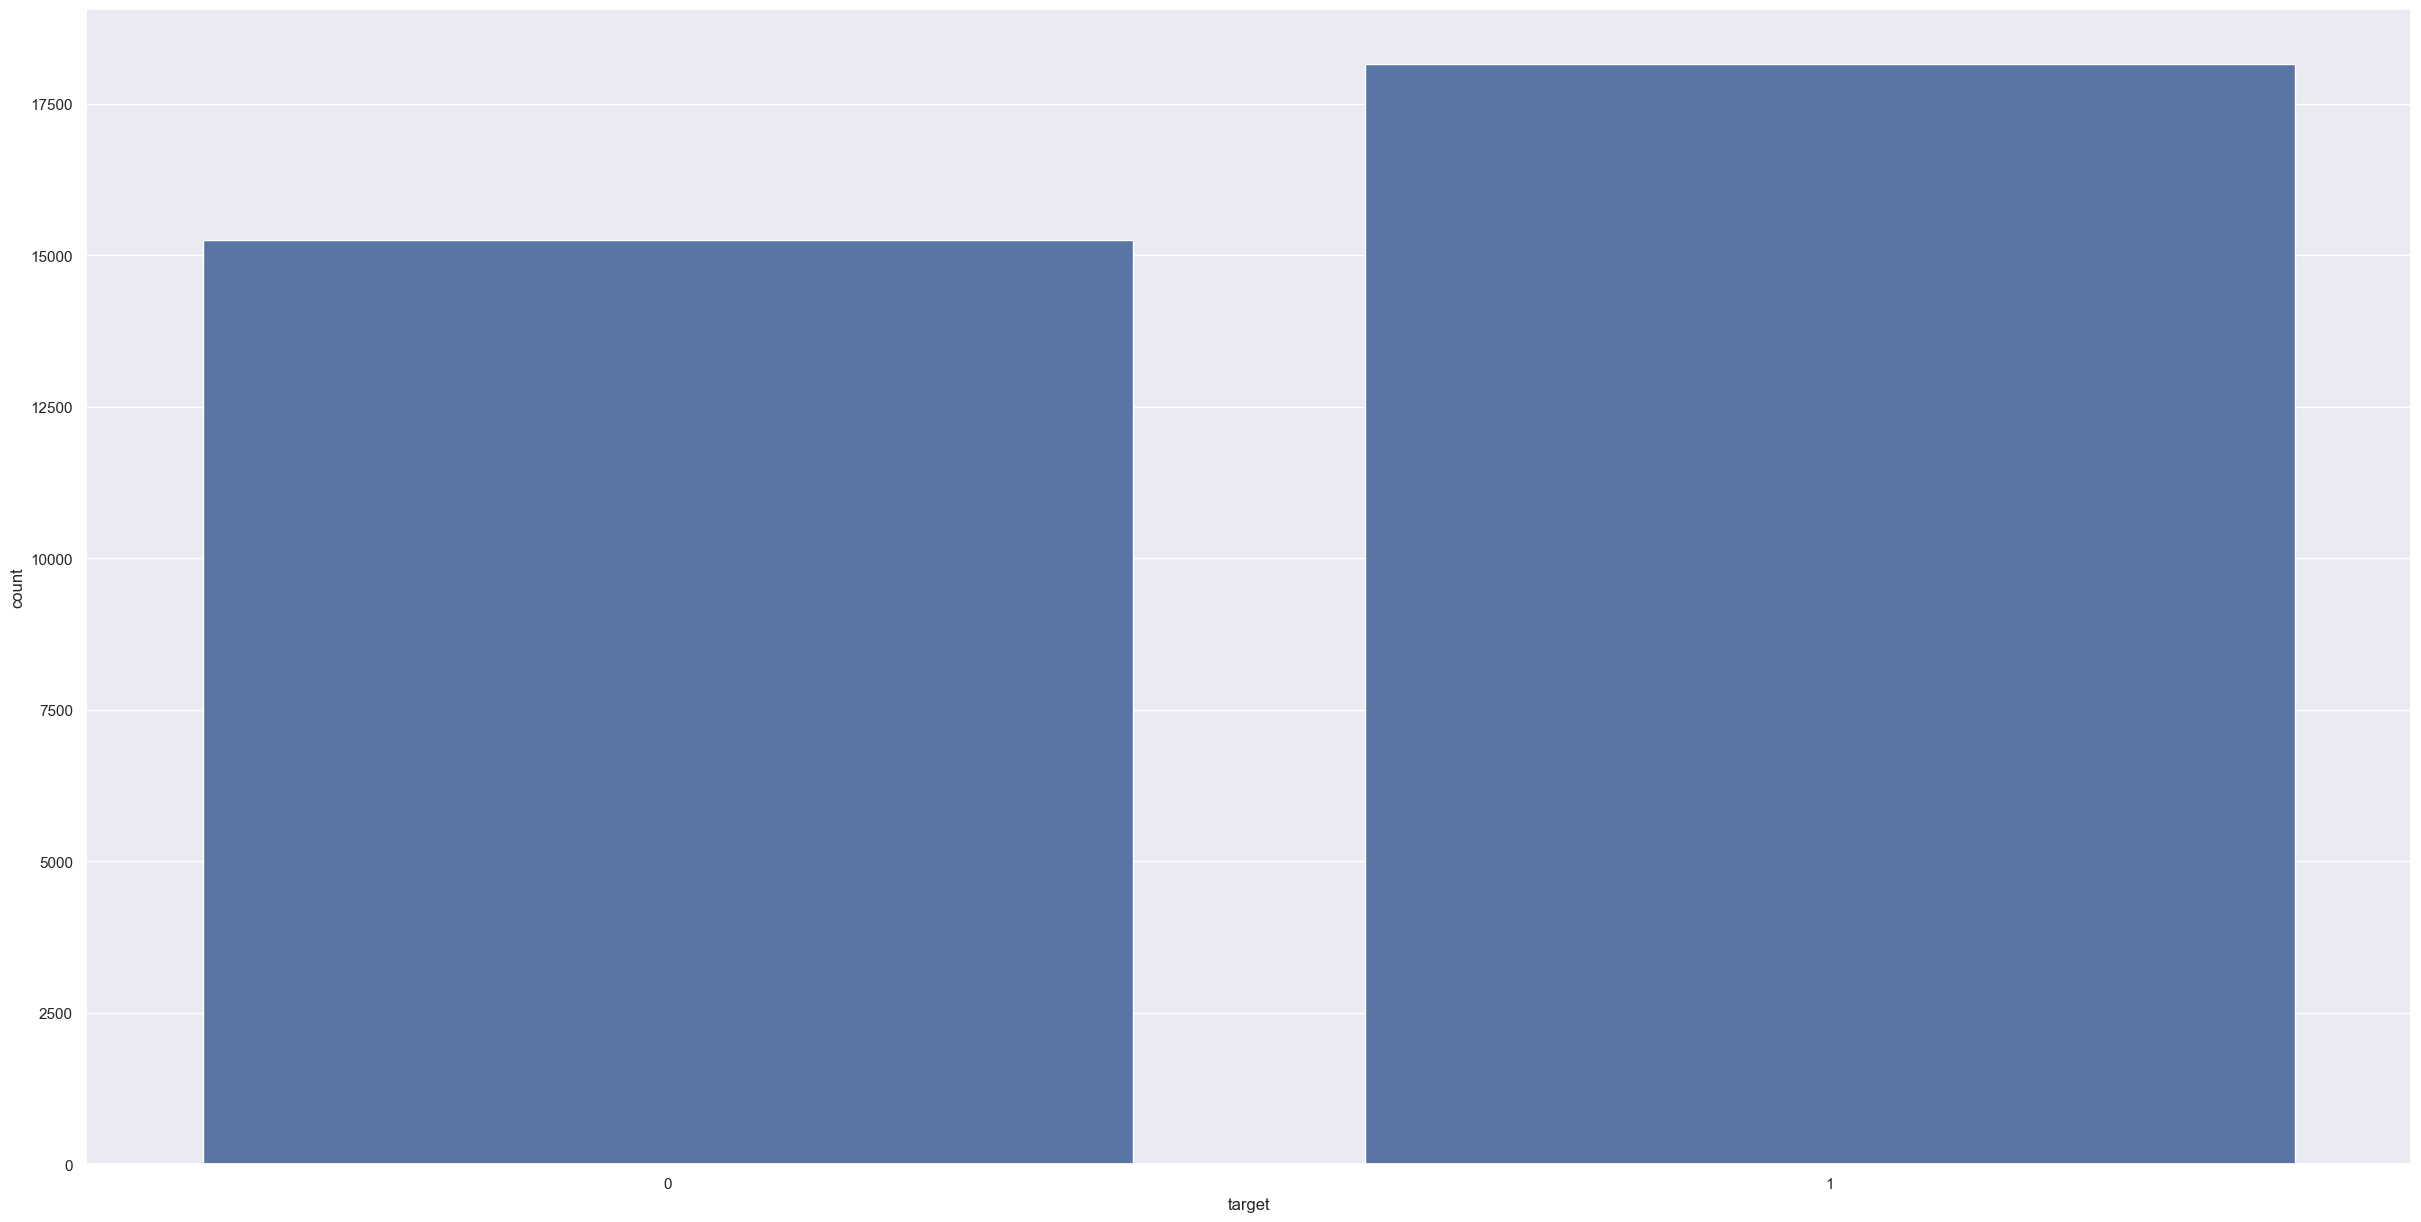

In [46]:
sns.countplot(x='target', data=df_merge)
sns.set(rc={'figure.figsize':(15,11)}) #no of observations

In [48]:
df_merge.groupby('target')[['danceability', 'energy', 'key', 'loudness',
       'mode', 'acousticness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'chorus_hit', 'sections']].count()

,danceability,energy,key,loudness,mode,acousticness,liveness,valence,tempo,duration_ms,chorus_hit,sections
target,,,,,,,,,,,,
0,15247,15247,15247,15247,15247,15247,15247,15247,15247,15247,15247,15247
1,18154,18154,18154,18154,18154,18154,18154,18154,18154,18154,18154,18154


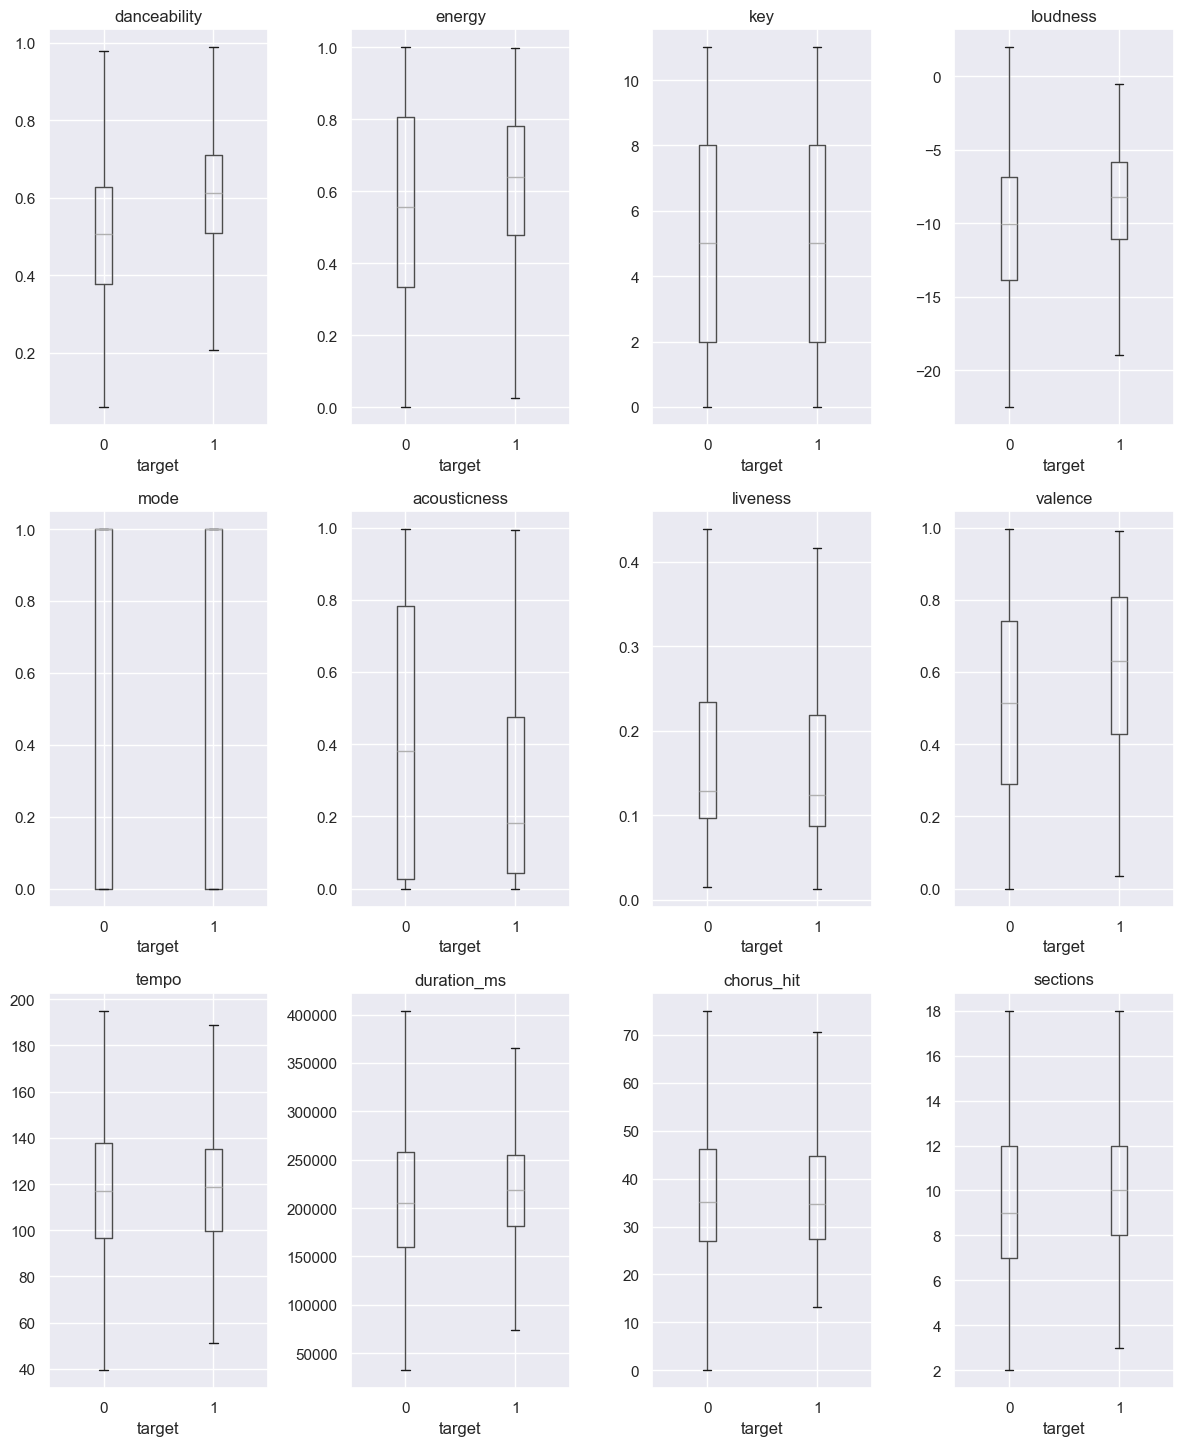

In [50]:
plt.rcParams["figure.figsize"] = [12, 15]
fig, axes = plt.subplots(nrows=3, ncols=4, )
df_merge.boxplot(column= 'danceability', by='target', ax=axes[0][0], showfliers=False)
df_merge.boxplot(column= 'energy', by='target', ax=axes[0][1], showfliers=False)
df_merge.boxplot(column='key', by='target', ax=axes[0][2], showfliers=False)
df_merge.boxplot(column='loudness', by='target', ax=axes[0][3], showfliers=False)
df_merge.boxplot(column='mode', by='target', ax=axes[1][0], showfliers=False)
df_merge.boxplot(column='acousticness', by='target', ax=axes[1][1], showfliers=False)
df_merge.boxplot(column='liveness', by='target', ax=axes[1][2], showfliers=False)
df_merge.boxplot(column='valence', by='target', ax=axes[1][3], showfliers=False)
df_merge.boxplot(column='tempo', by='target', ax=axes[2][0], showfliers=False)
df_merge.boxplot(column='duration_ms', by='target', ax=axes[2][1], showfliers=False)
df_merge.boxplot(column='chorus_hit', by='target', ax=axes[2][2], showfliers=False)
df_merge.boxplot(column='sections', by='target', ax=axes[2][3], showfliers=False)
plt.tight_layout()
plt.suptitle(None)
plt.show()
#different boxplot for eaxch weighs

In [54]:
df_merge.iloc[:,3:15]

,danceability,energy,key,loudness,mode,acousticness,liveness,valence,tempo,duration_ms,chorus_hit,sections
1,0.702372,-0.962845,-0.056839,-1.347518,0.651748,-0.687071,-0.833775,0.129894,-0.679333,0.270309,0.297336,0.736324
2,0.383889,0.572300,0.508438,-0.077680,0.651748,-0.866874,-1.219258,1.072119,0.299742,0.627378,-0.954350,1.088622
3,-0.453605,0.064814,1.073715,0.464381,-1.534336,-1.052494,-0.670612,-1.421093,0.014706,1.484661,-0.232437,1.440921
4,0.171566,0.060585,-0.904754,-0.208482,0.651748,-0.903937,0.477252,0.626210,-1.042337,-1.082383,-0.891659,0.384025
5,0.053610,1.109389,-0.056839,1.047686,0.651748,0.982306,-0.543708,1.308644,-0.206503,2.637682,0.573702,1.793219
...,...,...,...,...,...,...,...,...,...,...,...,...
41101,2.188628,-1.077029,-1.187393,-0.315951,0.651748,-0.940388,0.191002,-1.130283,-0.736471,-0.213171,-1.157233,1.088622
41102,0.389787,-0.057829,-0.904754,0.146450,0.651748,-0.356259,-0.391041,-0.401319,-0.650982,-0.463277,-0.778988,-1.729765
41103,0.431071,0.682255,0.508438,0.550168,0.651748,-1.032189,-0.745037,-0.486623,-1.011598,0.638884,-1.043526,1.440921
41104,0.000529,0.948685,0.791076,1.289257,0.651748,-0.837162,0.410460,-0.432339,-1.385668,-0.506602,-1.266944,-1.025168


In [56]:
scale = StandardScaler()
scale_X = scale.fit_transform(df_merge.iloc[:,3:15])
df_merge.iloc[:,3:15] = scale_X

In [64]:
data = pd.DataFrame(df_merge)

In [72]:
data.shape[0]

33401

In [74]:
#training the models
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, precision_score, recall_score, confusion_matrix

import warnings
warnings.filterwarnings("ignore")


In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33401 entries, 1 to 41105
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   track         33401 non-null  object 
 1   artist        33401 non-null  object 
 2   uri           33401 non-null  object 
 3   danceability  33401 non-null  float64
 4   energy        33401 non-null  float64
 5   key           33401 non-null  float64
 6   loudness      33401 non-null  float64
 7   mode          33401 non-null  float64
 8   acousticness  33401 non-null  float64
 9   liveness      33401 non-null  float64
 10  valence       33401 non-null  float64
 11  tempo         33401 non-null  float64
 12  duration_ms   33401 non-null  float64
 13  chorus_hit    33401 non-null  float64
 14  sections      33401 non-null  float64
 15  target        33401 non-null  int64  
 16  decade        33401 non-null  int64  
dtypes: float64(12), int64(2), object(3)
memory usage: 4.6+ MB


In [84]:
features = ['danceability', 'energy', 'key', 'loudness', 'mode',
            'acousticness', 'liveness', 'valence', 'tempo',
            'duration_ms', 'chorus_hit', 'sections']
target = 'target'

In [92]:
#data preprocessing

X = data[features]
y = data[target]

In [94]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [104]:
# Model Training and Evaluation
models = {
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier()
}

SVM - Accuracy: 0.7345, F1-score: 0.7785
              precision    recall  f1-score   support

           0       0.79      0.58      0.67      3076
           1       0.71      0.86      0.78      3605

    accuracy                           0.73      6681
   macro avg       0.75      0.72      0.72      6681
weighted avg       0.74      0.73      0.73      6681



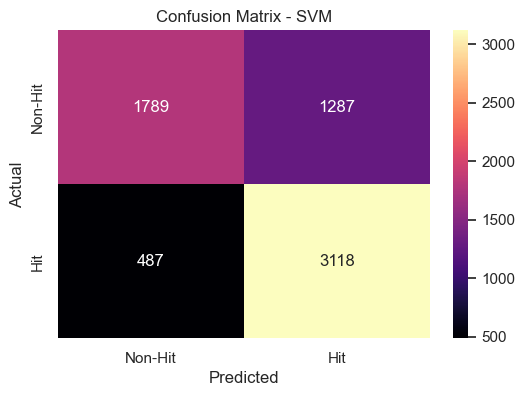

Random Forest - Accuracy: 0.7411, F1-score: 0.7766
              precision    recall  f1-score   support

           0       0.76      0.63      0.69      3076
           1       0.73      0.83      0.78      3605

    accuracy                           0.74      6681
   macro avg       0.75      0.73      0.73      6681
weighted avg       0.74      0.74      0.74      6681



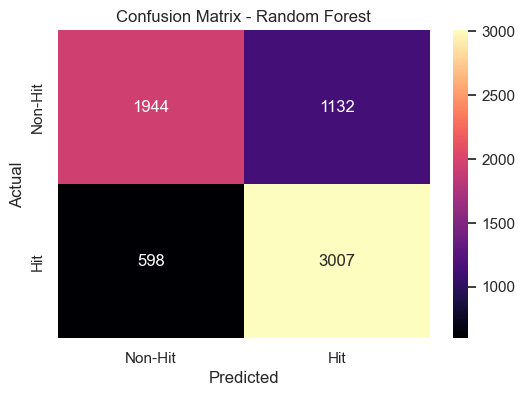

Logistic Regression - Accuracy: 0.6747, F1-score: 0.7169
              precision    recall  f1-score   support

           0       0.67      0.57      0.62      3076
           1       0.68      0.76      0.72      3605

    accuracy                           0.67      6681
   macro avg       0.67      0.67      0.67      6681
weighted avg       0.67      0.67      0.67      6681



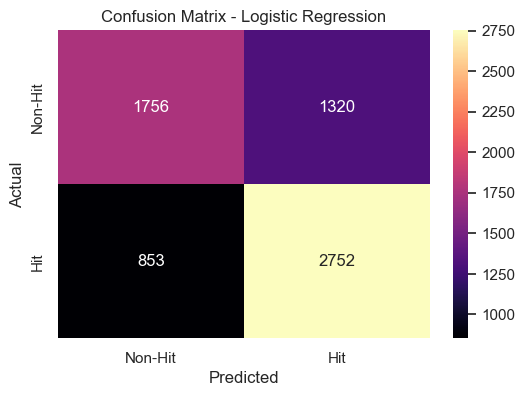

KNN - Accuracy: 0.6947, F1-score: 0.7397
              precision    recall  f1-score   support

           0       0.71      0.57      0.63      3076
           1       0.68      0.80      0.74      3605

    accuracy                           0.69      6681
   macro avg       0.70      0.69      0.69      6681
weighted avg       0.70      0.69      0.69      6681



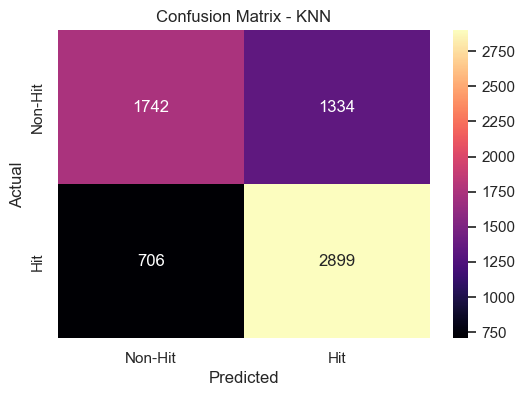

In [106]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"{name} - Accuracy: {acc:.4f}, F1-score: {f1:.4f}")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix Heatmap
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='magma', xticklabels=['Non-Hit', 'Hit'], yticklabels=['Non-Hit', 'Hit'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()


In [108]:
#hyperparamter tuning
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as ss

In [110]:
rf_params = {
    "n_estimators": ss.randint(50, 300),
    "max_depth": ss.randint(5, 30),
    "min_samples_split": ss.randint(2, 10),
}

rf_random = RandomizedSearchCV(RandomForestClassifier(), rf_params, cv=5, n_iter=10, scoring="accuracy", random_state=42)
rf_random.fit(X_train, y_train)

best_rf = rf_random.best_estimator_
print(f"Random Forest Best Params: {rf_random.best_params_}")
print(f"Random Forest Best Accuracy: {rf_random.best_score_}")


Random Forest Best Params: {'max_depth': 25, 'min_samples_split': 2, 'n_estimators': 253}
Random Forest Best Accuracy: 0.7431511976047904


In [140]:
# Retrain Random Forest
scores = []
for i in range(10):
    best_rf = RandomForestClassifier(**rf_random.best_params_)
    best_rf.fit(X_train, y_train)
    scores.append(best_rf.score(X_test, y_test))
print(f"Final accuracy after retraining (10 iterations): {np.max(scores)}")
    


Final accuracy after retraining (10 iterations): 0.7422541535698248
